# 4. Data Preprocessing 

## 4.1 Import Libraries

In [1]:
pip install pandas matplotlib numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## 4.2 Import Cleaned Dataset

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

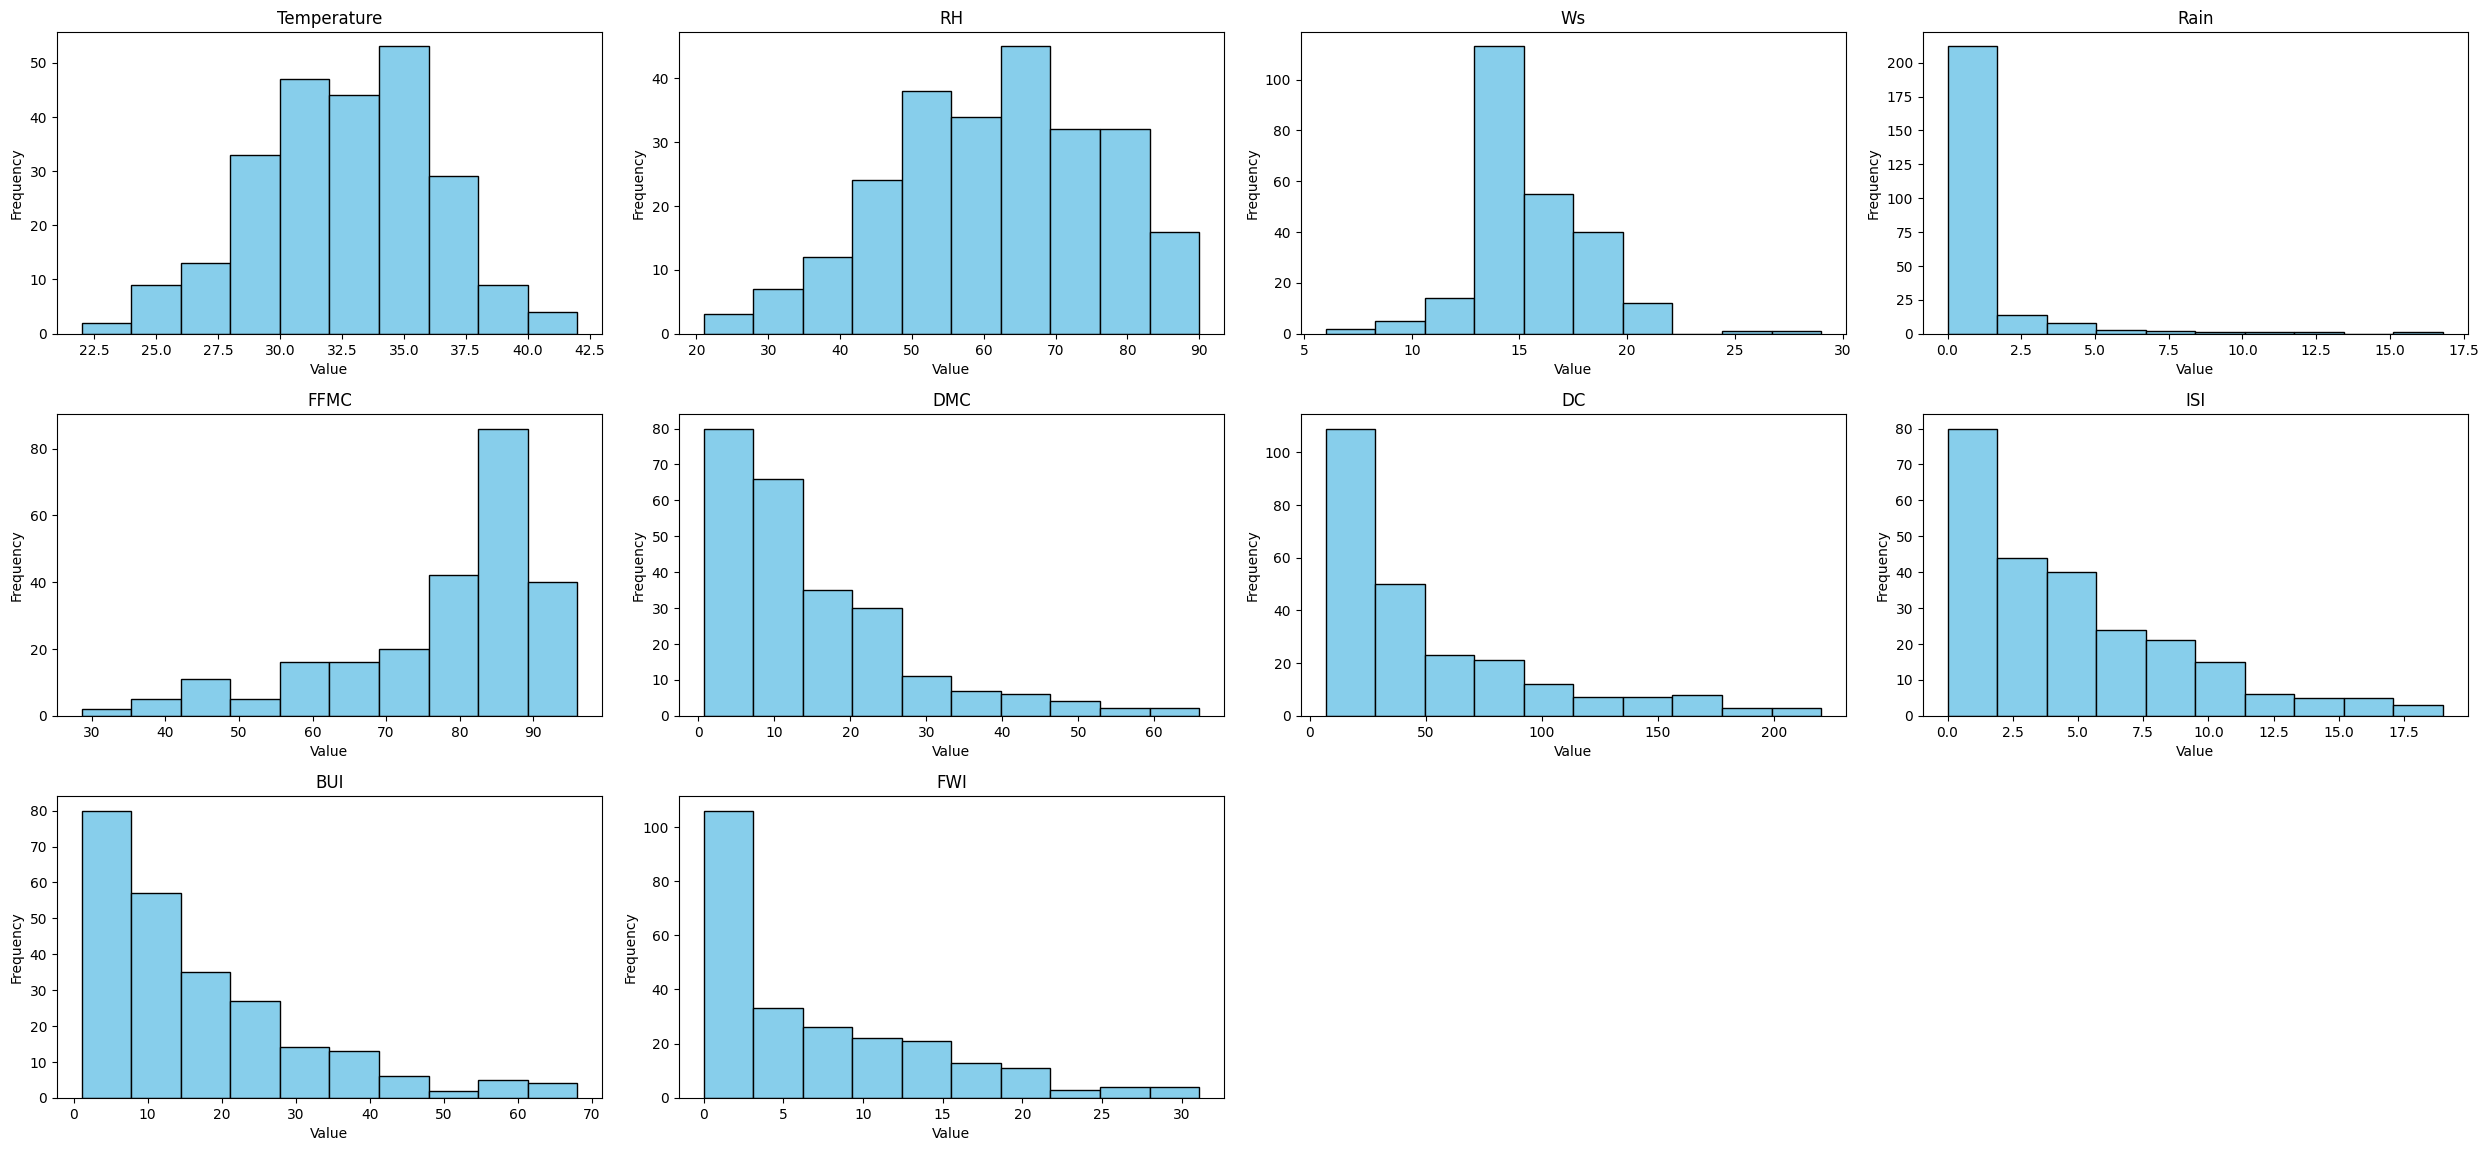

In [5]:
import matplotlib.pyplot as plt

# Selecting numerical columns

numerical_cols = ['Temperature', 'RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size as needed
    df[col].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


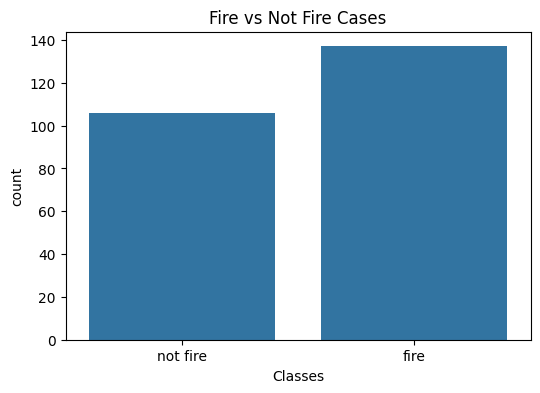

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Classes')
plt.title('Fire vs Not Fire Cases')
plt.show()


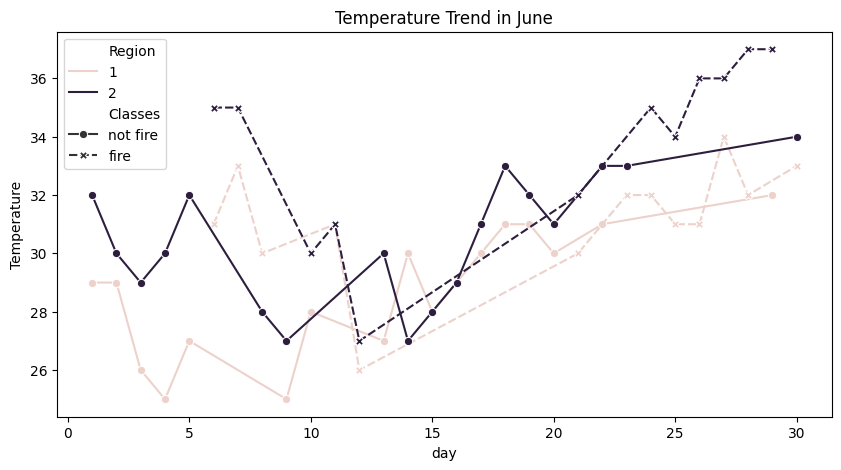

In [7]:
sample = df[df['month'] == 6]
plt.figure(figsize=(10, 5))
sns.lineplot(data=sample, x='day', y='Temperature', hue='Region', style='Classes', markers=True)
plt.title('Temperature Trend in June')
plt.show()


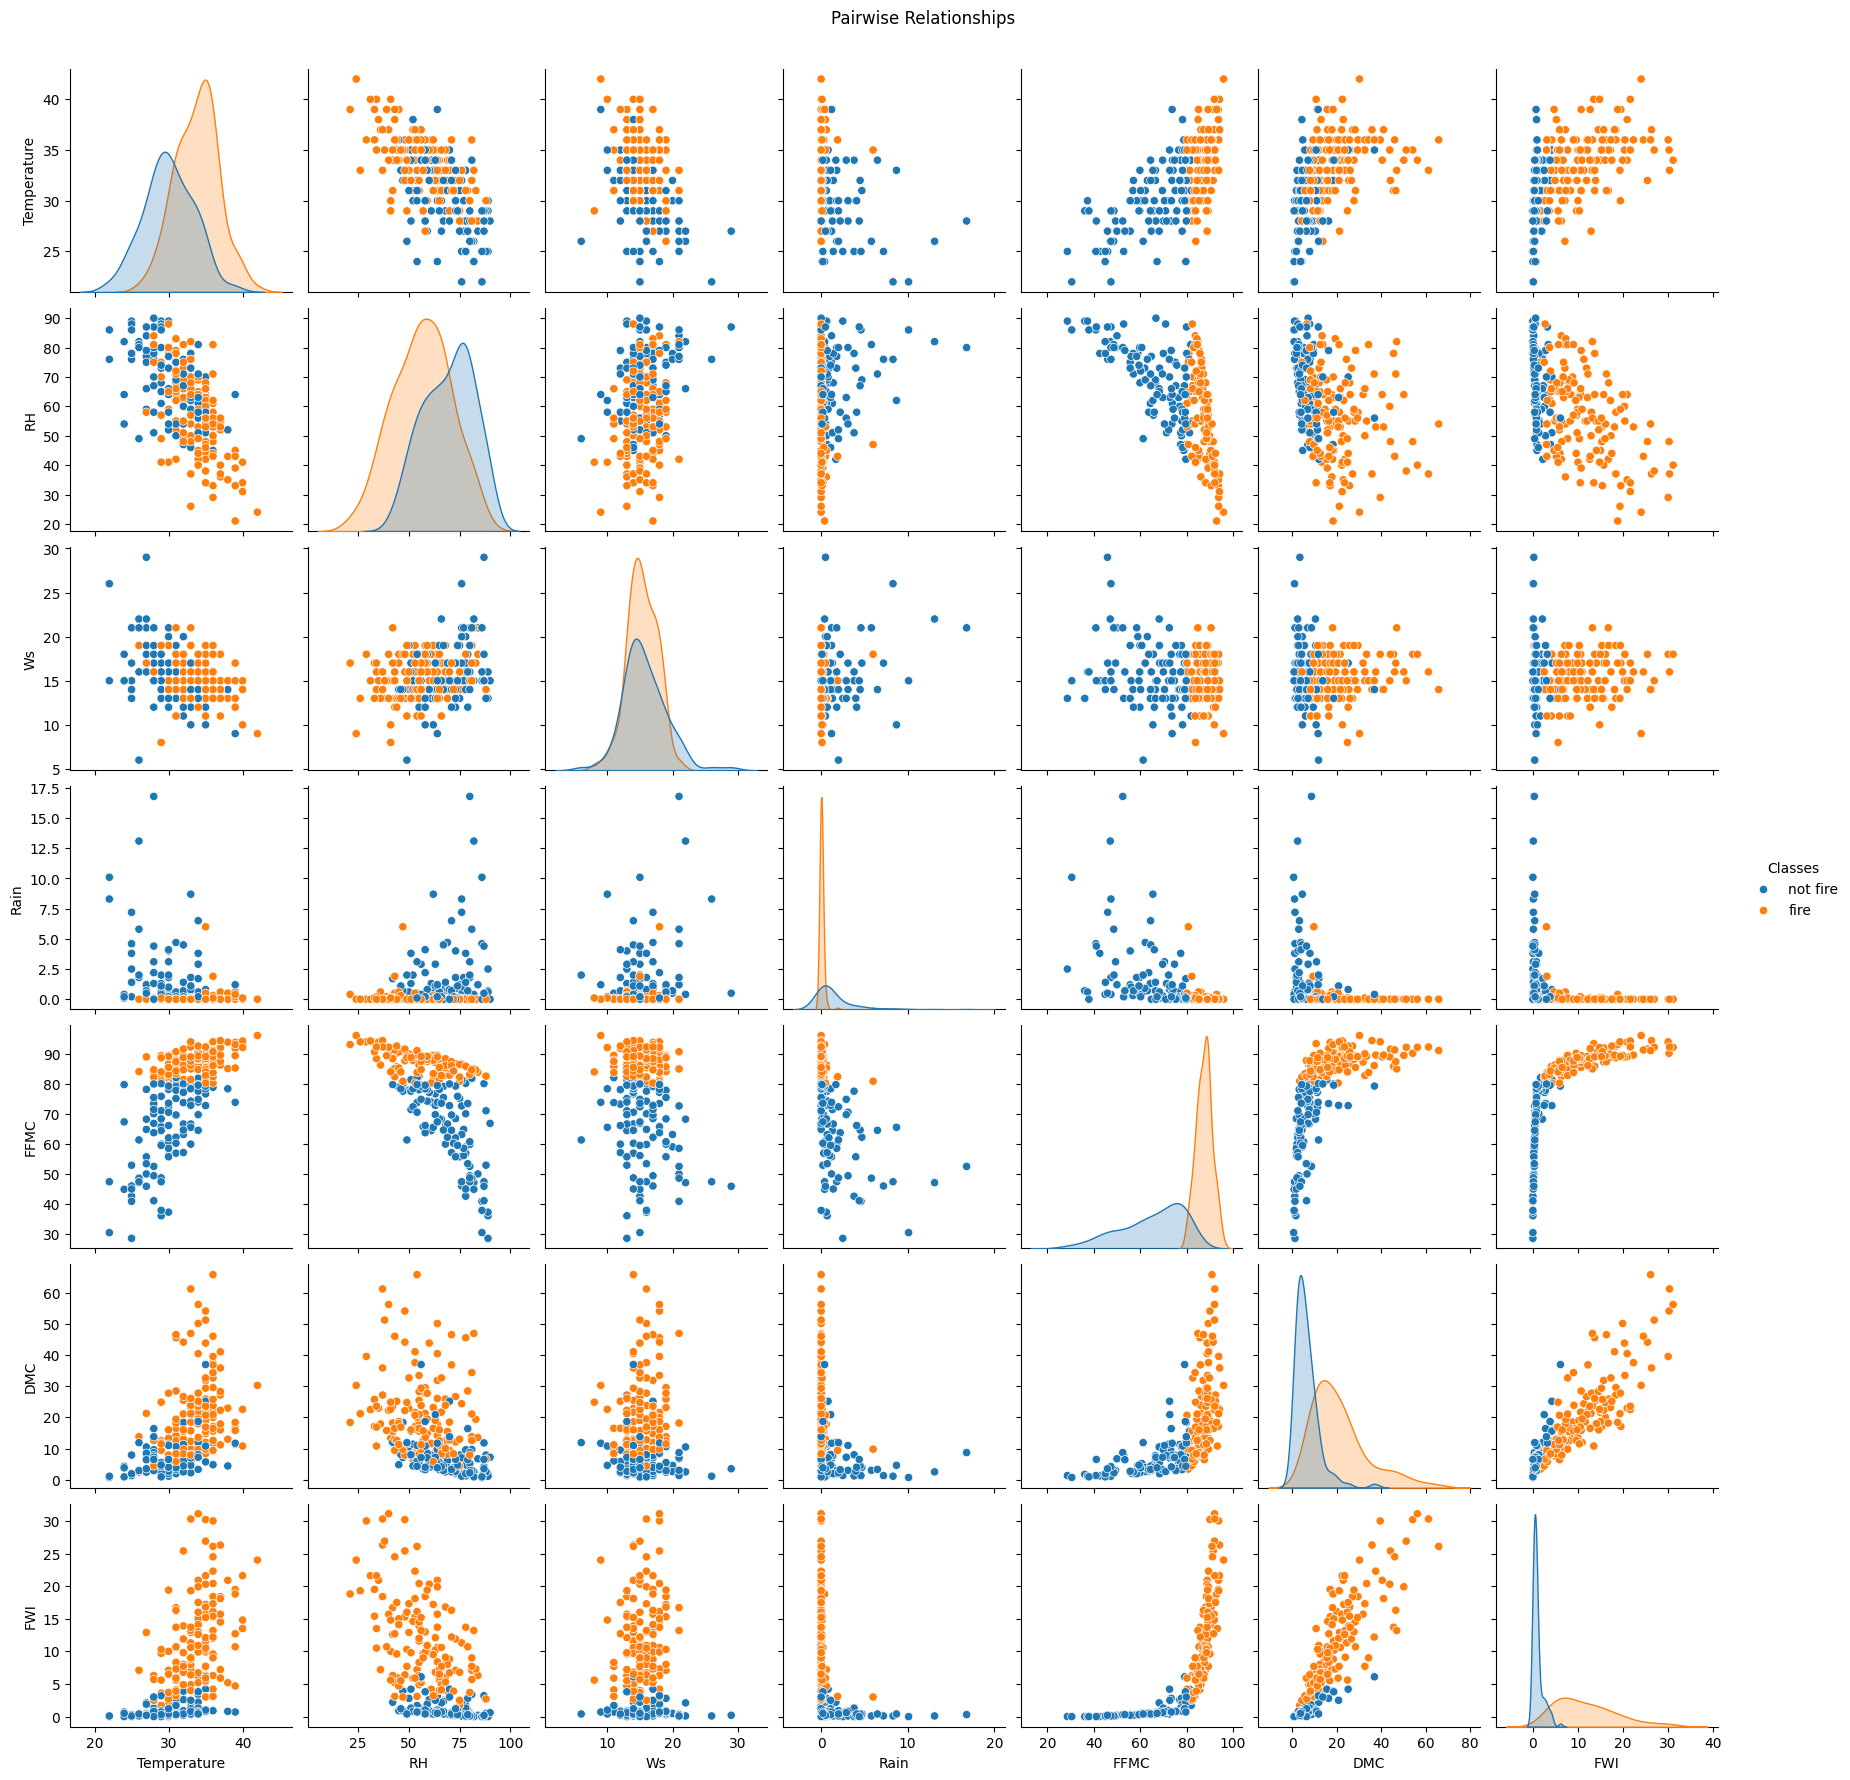

In [8]:
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'FWI', 'Classes']], hue='Classes')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


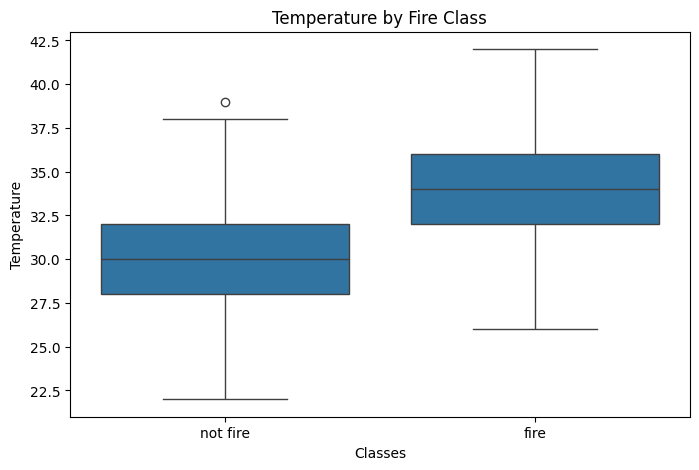

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Classes', y='Temperature')
plt.title('Temperature by Fire Class')
plt.show()


## 4.3 Train Test Split

In [10]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [11]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [12]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


#### Checking multicollinearlity and remove highly corrrelated features

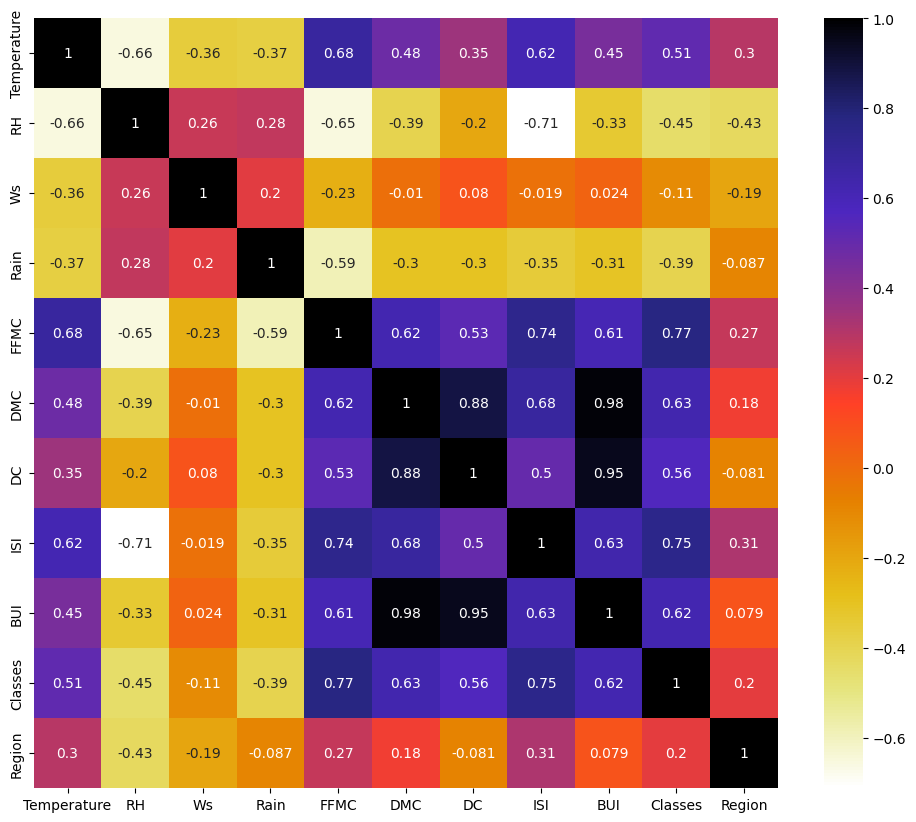

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X_train, 0.75)

In [18]:
# features which has correlation more than 0.75
corr_features

{'BUI', 'Classes', 'DC'}

In [19]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

# 5. Model Selection For Regression 
* Now start the model selection process where we try out bunch of different models. 
* Choose some and fine tune and Finalize one model

## 5.5 Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9789
MAE value: 0.5933


## 4.7 Hyperparameter Tuning

### Tuning Random Forest Regressor

In [21]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\daram\OneDrive\Desktop

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [22]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9661
MAE value: 0.8007


#### Feature removal

For the web app, I will use the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app. I will drop the rest of features so we can build an interactive and user friendly web app.

In [23]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,FFMC,0.316166
6,ISI,0.233466
5,DMC,0.228235
3,Rain,0.089981
1,RH,0.072274
0,Temperature,0.040549
2,Ws,0.014180
7,Region,0.005150


Text(0, 0.5, 'Features')

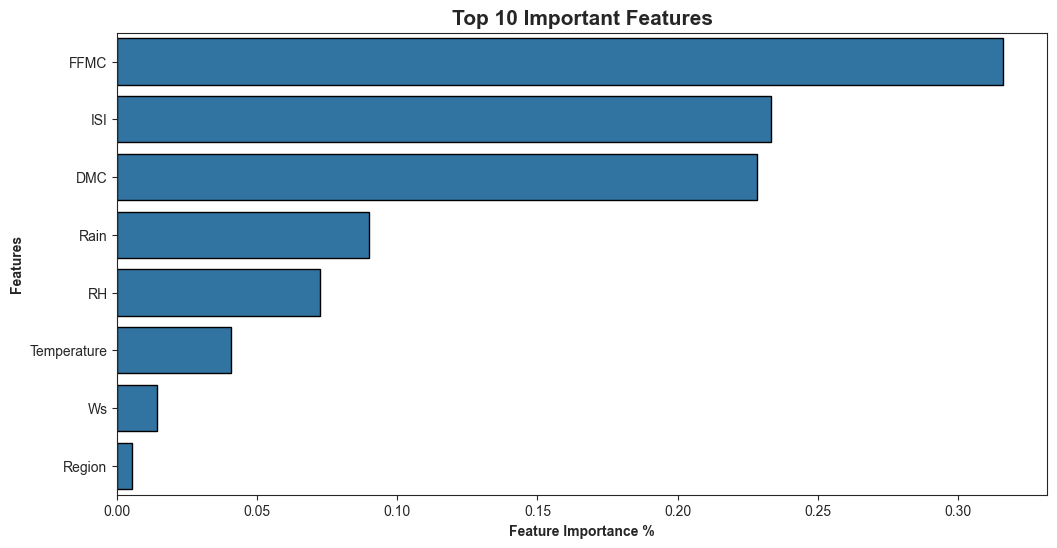

In [24]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

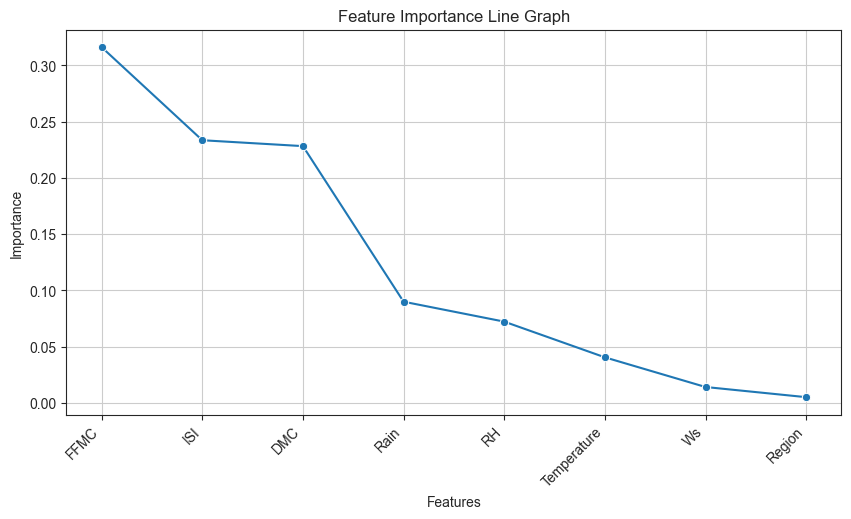

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance as a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=importance_df['feature'], y=importance_df['importance'], marker='o')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Line Graph")
plt.grid(True)

plt.show()


### Model for deployment

In [26]:
Xtrain_new = X_train.drop(['Rain', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['Rain', 'Region', 'RH'], axis=1)

In [27]:
Xtrain_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [28]:
best_random_grid.fit(Xtrain_new, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9780
MAE value: 0.6684


In [29]:
import bz2,pickle
file = bz2.BZ2File('regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

# 6. Model Selection For Classification
* Now start the model selection process where we try out bunch of different models. 
* Choose some and fine tune and Finalize one model

## 6.1 Import Libraries

In [30]:
!pip install scikit-learn xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 6.2 Data Preprocessing for Classification

In [32]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [33]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

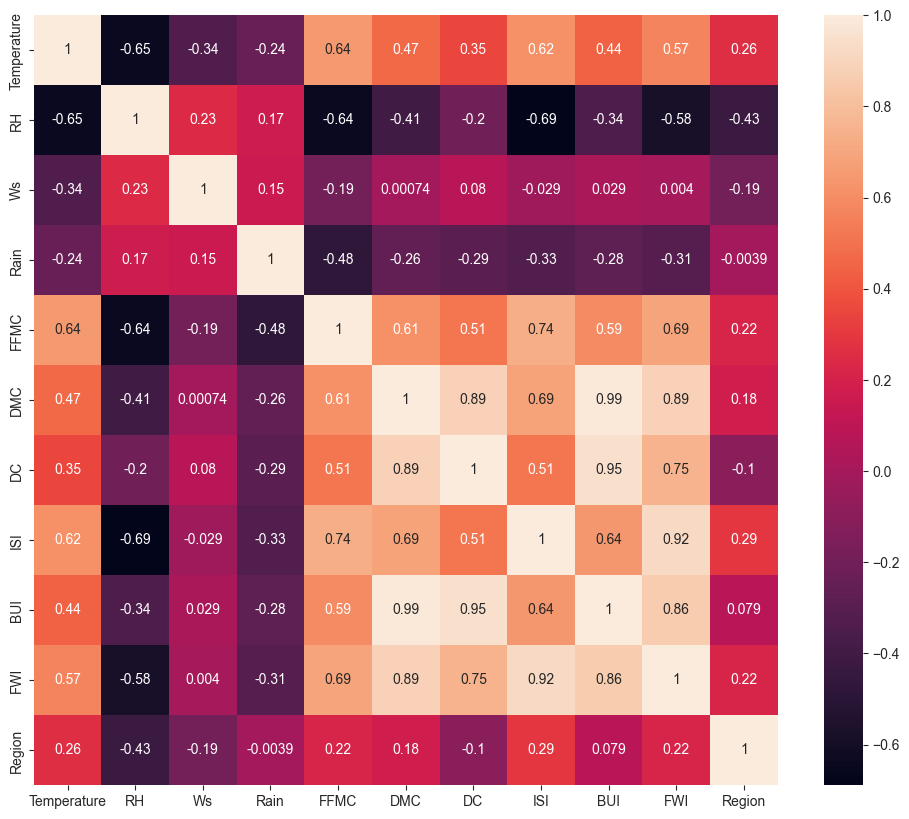

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [35]:
corr_features = correlation(X_train, 0.75)

In [36]:
corr_features

{'BUI', 'DC', 'FWI'}

In [37]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

## 6.5 Random Forest

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



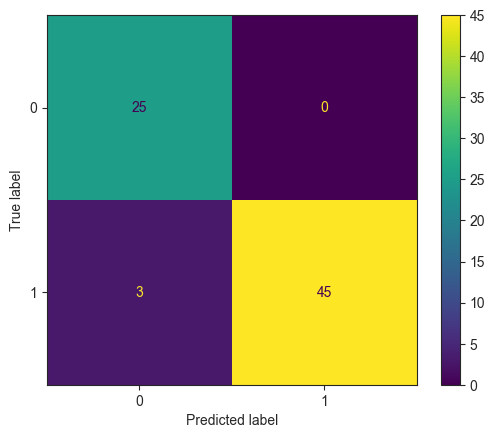

In [39]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

## 6.8 HyperParameter Tuning

### **Random Forest classifier Tuning**

In [40]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train, y_train).best_estimator_

C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\daram\OneDrive\Desktop\Lowkya\Lowkya\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\daram\OneDrive\Desktop

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=90)

In [41]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test,y_test)
bestrf_pred = best_rf.predict(X_test)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



## 7. Model Selection

### 7.1 Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models

Implementing the concept of **StratifiedK fold sampling** in cross-validation ensures the training and test sets have the same proportion of the feature of interest as in the original dataset. Doing this with the target variable ensures good accuracy without error.

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 36)

In [43]:
cv_rf=cross_val_score(rfc,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9752


### Fetaure Selection for Model Deployment

In [44]:
feature_importances = random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,FFMC,0.428252
6,ISI,0.322594
5,DMC,0.121223
3,Rain,0.096467
0,Temperature,0.020426
1,RH,0.009875
2,Ws,0.001163
7,Region,0.000000


Text(0, 0.5, 'Features')

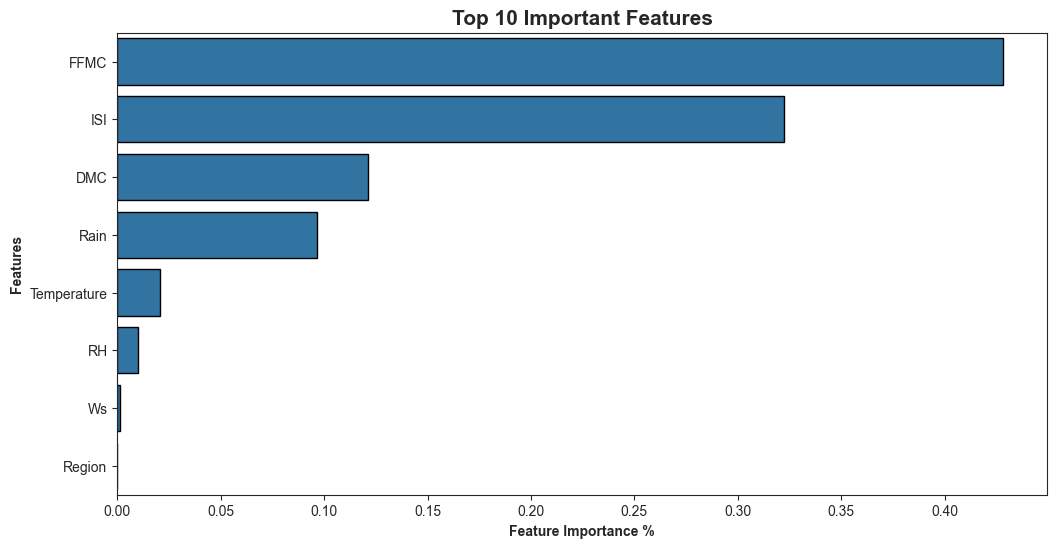

In [45]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

## 7.3 Model Deployment 

In [46]:
Xtrain_new = X_train.drop(['Rain', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['Rain', 'Region', 'RH'], axis=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain_new, y_train)

# Get the accuracy score
score = rf_model.score(Xtest_new, y_test)

# Make predictions on the test set (this should give discrete labels)
rf_model_pred = rf_model.predict(Xtest_new)

# Generate the classification report
cr = classification_report(y_test, rf_model_pred)

# Output the results
print("Final Model")
print(f"Accuracy Score value: {score:.4f}")
print(cr)


Final Model
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [48]:
#Compresssing the pickle file which has 5 features to build Web Application
import bz2,pickle
file = bz2.BZ2File('classification.pkl','wb')
pickle.dump(rf_model,file)
file.close()

# Upload To MongoDB

In [49]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
final_df =df.drop(['BUI','DC','Rain', 'Region','RH'],axis=1)


from pymongo import MongoClient
# Establish a connection to a MongoDB Atlas Cluster with Secured Authentication using User Name and Password of the Database
client = MongoClient("mongodb+srv://Lowkya:<dbpassword>@cluster0.rpyvx.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0")
# Create Database and specify name of database
db = client.get_database('FireDataML')
# Create a collection
records = db.ml_task

data = final_df.to_dict(orient = 'records')
db.ml_task.insert_many(data)

InsertManyResult([ObjectId('688491463ac03e821a972d65'), ObjectId('688491463ac03e821a972d66'), ObjectId('688491463ac03e821a972d67'), ObjectId('688491463ac03e821a972d68'), ObjectId('688491463ac03e821a972d69'), ObjectId('688491463ac03e821a972d6a'), ObjectId('688491463ac03e821a972d6b'), ObjectId('688491463ac03e821a972d6c'), ObjectId('688491463ac03e821a972d6d'), ObjectId('688491463ac03e821a972d6e'), ObjectId('688491463ac03e821a972d6f'), ObjectId('688491463ac03e821a972d70'), ObjectId('688491463ac03e821a972d71'), ObjectId('688491463ac03e821a972d72'), ObjectId('688491463ac03e821a972d73'), ObjectId('688491463ac03e821a972d74'), ObjectId('688491463ac03e821a972d75'), ObjectId('688491463ac03e821a972d76'), ObjectId('688491463ac03e821a972d77'), ObjectId('688491463ac03e821a972d78'), ObjectId('688491463ac03e821a972d79'), ObjectId('688491463ac03e821a972d7a'), ObjectId('688491463ac03e821a972d7b'), ObjectId('688491463ac03e821a972d7c'), ObjectId('688491463ac03e821a972d7d'), ObjectId('688491463ac03e821a972d

In [53]:
final_df

,Temperature,Ws,FFMC,DMC,ISI,FWI,Classes
0,29,18,65.7,3.4,1.3,0.5,0
1,29,13,64.4,4.1,1.0,0.4,0
2,26,22,47.1,2.5,0.3,0.1,0
3,25,13,28.6,1.3,0.0,0.0,0
4,27,16,64.8,3.0,1.2,0.5,0
...,...,...,...,...,...,...,...
238,30,14,85.4,16.0,4.5,6.5,1
239,28,15,41.1,6.5,0.1,0.0,0
240,27,29,45.9,3.5,0.4,0.2,0
241,24,18,79.7,4.3,1.7,0.7,0


## Conclusion 

* This prediction can be used for calculating if the fire is possible at the location based on inputs. 
* Both classification and regression models were completed and deployed.